In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

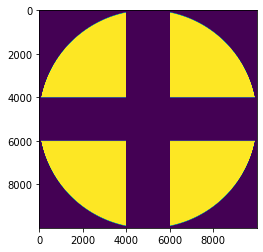

In [3]:
mask = create_circular_mask(10000,10000)
mask[:,4000:6000] = False
mask[4000:6000:] = False
plt.imshow(mask)

In [4]:
def huffman_encoding(mask):
    line_width = len(mask[0])
    compressed_mask = []
    boolean_to_string = lambda x: 'T' if x else 'F'
    for linei in mask:
        compressed_line = ''
        starting_character = linei[0]
        point_of_change = np.where(linei[:-1] != linei[1:])[0] + 1
        point_of_change[1:] = point_of_change[1:]-point_of_change[:-1]
        compressed_line+=boolean_to_string(starting_character)
        for change in point_of_change:
            starting_character = not starting_character
            compressed_line+=str(change)
            compressed_line+=boolean_to_string(starting_character)
        compressed_line+=str(line_width-sum(point_of_change))
        compressed_mask.append(compressed_line)
    return compressed_mask
    
def huffman_decompression(compressed_mask):
    string_to_bool = lambda x: True if x=='T' else False
    def get_numbers_of_repetition(line):
        numbers = line.split('T')
        return [int(j) for i in numbers for j in i.split('F') if j != '']
    mask = []
    for linei in compressed_mask:
        starting_state = string_to_bool(linei[0])
        reps = get_numbers_of_repetition(linei)
        line = []
        for rep in reps:
            line+= [starting_state]*rep
            starting_state = not starting_state
        mask.append(line)
    return np.array(mask)


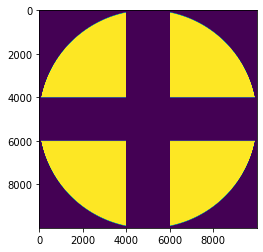

In [6]:
plt.imshow(mask_decompressed)

In [5]:
t = time()
compressed_mask = huffman_encoding(mask)
t1 = time()
print(f'compression took {t1-t} s')
mask_decompressed = huffman_decompression(compressed_mask)
print(f'decompression took {time()-t1} s')

compression took 0.228623628616333 s
decompression took 6.227658033370972 s


In [7]:
assert np.all(mask == mask_decompressed)